In [8]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import InputLayer, Dense
import pandas as pd
import numpy as np

In [9]:
#Importing data
train_db = pd.read_csv('../pre-processamento-e-transformacao/TRAIN_DB.csv')
test_db = pd.read_csv('../pre-processamento-e-transformacao/TEST_DB.csv')

y_train = train_db['SalePrice']
x_train = train_db.drop(['SalePrice'], axis=1)

y_test = test_db['SalePrice']
x_test = test_db.drop(['SalePrice'], axis=1)

In [10]:
# Transforming target variable interval
y_train = np.expm1((y_train + abs(y_train.min())) / 181000)
y_test = np.expm1((y_test + abs(y_test.min())) / 180000)

# print(y_train.describe())
# print('\n')
# print(y_test.describe())

In [11]:
# Normalizar
from sklearn.preprocessing import MinMaxScaler
#
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)
#
# print(x_train)
# print('\n')
# print(x_test)


In [12]:
# Creating model
input_neuron, hidden_neuron, output_neuron = np.size(x_train, 1), 5, 1

mlp = Sequential([
    InputLayer(input_neuron),
    Dense(hidden_neuron, activation="relu"),
    Dense(output_neuron)
])

# mlp = Sequential()
# # primeira camada escondida com 12 nós
# mlp.add(Dense(5, input_dim=np.size(x_train, 1), activation='relu'))
# # segunda camada escondida com 8 nós
# # mlp.add(Dense(8, activation='relu'))
# # camada de saída com 1 nó
# mlp.add(Dense(1, activation='sigmoid'))

In [13]:
# Summary representation
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 1445      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 1,451
Trainable params: 1,451
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compiling model
# adam é uma versão comum do gradiente descendente
opt = keras.optimizers.Adam(learning_rate=0.01)
mlp.compile(optimizer=opt, loss="mse")

## Medidas Desempenho

* **r2_score**(y_test, y_pred)

* **Gráfico de Dispersão**

* **median_absolute_error**(y_test, y_pred)

In [15]:
from keras.callbacks import EarlyStopping

epochs = 1000
batch_size = 20
callbacks = [EarlyStopping(monitor='loss', patience=30, verbose=1)]

2021-10-13 19:20:24.900158: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
52/52 [==============================] - 1s 2ms/step - loss: 9.0250
Epoch 2/1000
52/52 [==============================] - 0s 1ms/step - loss: 7.1541
Epoch 3/1000
52/52 [==============================] - 0s 969us/step - loss: 6.4229
Epoch 4/1000
52/52 [==============================] - 0s 1ms/step - loss: 5.8642
Epoch 5/1000
52/52 [==============================] - 0s 1ms/step - loss: 5.4633
Epoch 6/1000
52/52 [=========================

(0.0, 100.0)

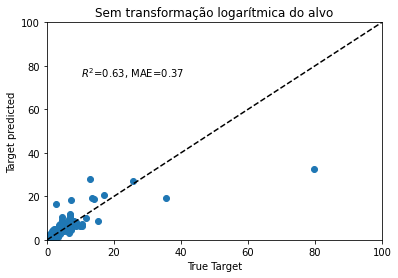

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score

# Training the model
Seq_without_y_log = mlp.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=callbacks)

y_pred = mlp.predict(x_test)

r2 = r2_score(y_test, y_pred)

mae = median_absolute_error(y_test, y_pred)

# Plot results
ax0 = plt.axes()

ax0.scatter(y_test, y_pred)
ax0.plot([0, 100], [0, 100], '--k')
ax0.set_ylabel('Target predicted')
ax0.set_xlabel('True Target')
ax0.set_title('Sem transformação logarítmica do alvo')
ax0.text(10, 75, r'$R^2$=%.2f, MAE=%.2f' % (
    r2, mae))
ax0.set_xlim([0, 100])
ax0.set_ylim([0, 100])


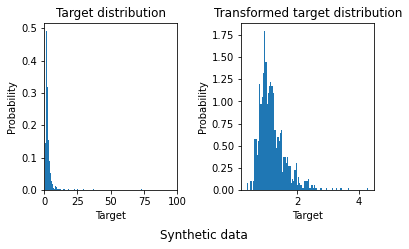

In [17]:
y_train_log = np.log1p(y_train)
# y_test_log = np.log1p(y_test)

## Y log

f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y_train, bins=100, density=True)
ax0.set_xlim([0, 100])
ax0.set_ylabel('Probability')
ax0.set_xlabel('Target')
ax0.set_title('Target distribution')

ax1.hist(y_train_log, bins=100, density=True)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Target')
ax1.set_title('Transformed target distribution')

f.suptitle("Synthetic data", y=0.06, x=0.53)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])


Epoch 1/1000
52/52 [==============================] - 0s 980us/step - loss: 1.6645
Epoch 2/1000
52/52 [==============================] - 0s 1ms/step - loss: 0.1855
Epoch 3/1000
52/52 [==============================] - 0s 937us/step - loss: 0.1839
Epoch 4/1000
52/52 [==============================] - 0s 1ms/step - loss: 0.1845
Epoch 5/1000
52/52 [==============================] - 0s 1ms/step - loss: 0.1840
Epoch 6/1000
52/52 [==============================] - 0s 927us/step - loss: 0.1840

(0.0, 100.0)

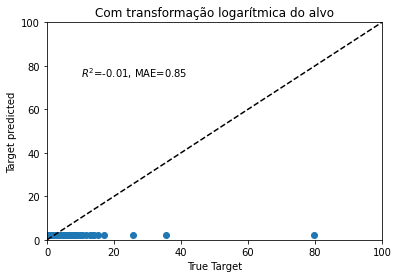

In [18]:
## Predicting with y log

Seq_with_y_log = mlp.fit(x_train, y_train_log, batch_size=batch_size, epochs=epochs, callbacks=callbacks)

y_pred = np.expm1(mlp.predict(x_test))

r2 = r2_score(y_test, y_pred)

mae = median_absolute_error(y_test, y_pred)

# Plot results
ax0 = plt.axes()
ax0.scatter(y_test, y_pred)
ax0.plot([0, 100], [0, 100], '--k')
ax0.set_ylabel('Target predicted')
ax0.set_xlabel('True Target')
ax0.set_title('Com transformação logarítmica do alvo')
ax0.text(10, 75, r'$R^2$=%.2f, MAE=%.2f' % (
    r2, mae))
ax0.set_xlim([0, 100])
ax0.set_ylim([0, 100])